# Intro to Neural Networks


In the last few years Neural Networks have exploded in popularity. Now, much of
machine learning research and the news surrounding it usually involve neural
networks. Many of the recent advances in machine learning come from deep
learning, which just refers to using more complex neural networks.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings("ignore")


In [2]:
def plot_boundaries(model, X, Y):
    """
    Helper function that plots the decision boundaries of a model and data (X,Y)
    code modified from:
    https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
    """

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape).round()

    plt.contourf(xx, yy, Z, alpha=0.4)

    # Plot
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor="k")
    plt.title("Decision Boundry of Neural Network")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.show()


## The Basics

A neural network is divided into many layers, sometimes hundreds, but they can
be grouped into 3 categories.


<img src="https://drive.google.com/uc?export=view&id=1C_kEnG6gryrih4hJESiFR-welgUL5tc2" width=300 height=300/>


1. **Input Layer**: This layer represents the underlying features of our
   independent variable. If our data has $d$ features we will have $d$ input
   units.
2. **Hidden Layer**: The hidden layer(s) transform the input features into a
   format that is useful for classifying the data. The more hidden layers, and
   the more units in each layer, the more powerful the overall model is. State
   of the art networks for complex tasks like image recognition and autonomous
   driving, have dozens hidden layers (or even hundreds).
3. **Output Layer**: This layer represents the output choice of the model. For
   classification tasks we have one unit per class, each neuron represents a
   possible class.


The neurons are *layered* to show how they interact with each other.  Neurons in a particular layer will receive information from neurons in the previous layer; neurons in a layer will pass information forward to the next layer.  The first layer, where we can provide initial information is called the *input layer*; the final layer is called the *output layer*, where the processed information returns to us.  Any layers in between these are called *hidden layers*, because we don't observe the transformations happening.

(In actuality, this setup of network layers is called a *feed forward neural network*, because the information feeds forward through the layers; you can have more complicated setups in what are called *recurrent neural networks* that include cycles of information passing.)

Each neuron has an associated *weight* for every neuron that connects to it, which determines how much each of those neurons contributes.  Neurons also can have a *bias*, a constant factor that will adjust the value the neuron computes.  To illustrate, if we call the values that each of the input layer neurons have $a_1,\,a_2,\,a_3,\,a_4$, then the first hidden layer neuron has associated weights, $w_1,\,w_2,\,w_3,\,w_4$, for each of the input layers it is connected to:

### Complexity of the Network

As a general rule of thumb, more neurons in each layer and more layers lead to
more complex decision boundaries. This is because every time we add a layer, we
are using one more non-linear function, so that the output eventually becomes

        output = Non-linear(Non-linear(Non-linear(Non-linear(...input...)...)))

Let's actually fit and model the decision boundary of several networks to
visualize how network complexity affects the decision boundaries.


<img src="https://drive.google.com/uc?export=view&id=1zfALfxzDylgj9wBK_OuVYwXaUath1r0-" width="350" height="350" />

If we call the bias for this neuron $b$, then the value this neuron will pass forward is (or is at least proportional to) the formula:
$$ w_1a_1 + w_2a_2 + w_3a_3 + w_4a_4 - b. $$
We say "proportional to", because often you will want the values that the neurons have to be normalized in some way, e.g.: you may want them to only take on values between 0 and 1.  In this case, we can wrap the entire computation in a function that will output values where we want, such as the sigmoid function we'd seen before:
$$ \sigma(w_1a_1 + w_2a_2 + w_3a_3 + w_4a_4 - b). $$

Given $m$ input neurons, and $n$ (first) hidden layer neurons, we can express the computations in a matrix equation:

$$ \begin{bmatrix}a_{1}^{(2)}\\a_{2}^{(2)}\\ \vdots \\ a_{n}^{(2)} \end{bmatrix} \quad=\quad 
\sigma \left( \,\begin{bmatrix} w_{1,1} & w_{1,2} & \ldots & w_{1,m} \\ 
 w_{2,1} & w_{2,2} & \ldots & w_{2,m} \\
\vdots & \vdots & \ddots & \vdots\\
 w_{n,1} & w_{n,2} & \ldots & w_{n,m}\end{bmatrix}
\begin{bmatrix}a_{1}^{(1)}\\a_{2}^{(1)}\\ \vdots \\ a_{m}^{(1)}\end{bmatrix} \quad-\quad \begin{bmatrix}b_1^{(1)}\\b_2^{(1)}\\ \vdots \\ b_n^{(1)} \end{bmatrix}\, \right)$$

Here, the superscript $(i)$ denotes neurons in the $i^{th}$ layer.  Also note that the function is applied component-wise. Condensing this, using boldface to denote a vector:
$$  \bf{a}^{(2)} = \sigma(\bf{W}\bf{a}^{(1)} - \bf{b}). $$

The values from this second layer are then passed along to the third layer in the same way, for the third layer's own set of weights and biases, continuing along until they reach the output layer.

### Uses

One of the main uses of neural networks is using a series of transformations on audio or image information to *learn* how to classify specific types of audio (e.g.: speech) or images (e.g.: rabbits).  We could, for example, attempt to train a neural network to recognize hand-written characters, like letters or numbers:

<img src="https://drive.google.com/uc?export=view&id=1mCBu67TxHxq4Pr7ugN__0h0ndnXeTnJ1" height="300" width="300" />

The process is, generally, as follows:

1. Start with a very large collection of monochrome images of hand-written characters.  
2. Take each image, and convert it into a sequence of numbers:  one number for each pixel in the picture, with the number representing how dark the pixel is (i.e.: closer to 0 if it's light, closer to 1 if it's dark).
3. Create a neural network where there are as many input layer neurons as input pixel values for the images, and as many output layer neurons for the different classes (e.g.: 10 output neurons, one for each of 0,1,2,...,).  Decide how many hidden layers you want, and how many neurons for each layer.
4. Randomly chosen initial weights and biases will generally produce answers that don't resemble what you are looking for.  So as you feed it training data, create your cost function by averaging over the squared differences between the output values and the desired values (averaging over all of the training data).
5. Use gradient descent to find the optimal weights & biases that minimize the cost function.

At this point, you've created your classification model, and can test it by feeding it handwritten digits it has not yet seen.  This is what our example 4 looks like when we assign values to the pixels:

In [3]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Randomly initialize weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 34167149.89469008
1 30811359.246157877
2 32569223.39468036
3 33425893.410336606
4 29518406.75117729
5 20975354.25384861
6 12233146.356932394
7 6350892.03016543
8 3332577.5560296117
9 1932250.6969796908
10 1279187.8940774342
11 943788.4860145424
12 746983.6345916186
13 615527.0898929186
14 518953.32807078585
15 443480.10699245543
16 382408.726658612
17 331970.00378124876
18 289692.7327558439
19 253923.38425620418
20 223426.57022048754
21 197301.3814572688
22 174831.1858985714
23 155388.59806812013
24 138493.79086995442
25 123757.86680611887
26 110860.69314930362
27 99529.13682328834
28 89557.54765631753
29 80748.81383719196
30 72939.8666614785
31 65997.53310762203
32 59820.50831468153
33 54303.319543720645
34 49368.489818554124
35 44944.54557288089
36 40967.41862482981
37 37390.30380561737
38 34162.889155650206
39 31251.97659747951
40 28617.331004643795
41 26231.5404106208
42 24066.99039253714
43 22101.460082534766
44 20313.649213220357
45 18685.975671054548
46 17201.732281741042
47 1

In [4]:
# Alternative (more up to date python syntax) implementation of the above training loop
for t in range(500):
    # Forward pass: compute predicted y
    h = x @ w1
    h_relu = np.maximum(h, 0)
    y_pred = h_relu @ w2

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T @ grad_y_pred
    grad_h_relu = grad_y_pred @ w2.T
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T @ grad_h

    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 9.280245450017985e-07
1 8.865223387765894e-07
2 8.468850069509827e-07
3 8.090214157137272e-07
4 7.728565248422964e-07
5 7.38322103502153e-07
6 7.053348011998701e-07
7 6.73816207330859e-07
8 6.437082046848054e-07
9 6.149566591485025e-07
10 5.874906442107551e-07
11 5.612655063172079e-07
12 5.362059599146436e-07
13 5.122708502101144e-07
14 4.893996907837376e-07
15 4.6755803259105006e-07
16 4.4669753297380407e-07
17 4.267687934824257e-07
18 4.0772673911838454e-07
19 3.8953735070850855e-07
20 3.721659841727911e-07
21 3.555654121404762e-07
22 3.3970917091407526e-07
23 3.2456328378927265e-07
24 3.10093043870276e-07
25 2.9627134163432226e-07
26 2.830659784248629e-07
27 2.7045167585976844e-07
28 2.5839802617894013e-07
29 2.4688749142428157e-07
30 2.3588913534550907e-07
31 2.253813668698575e-07
32 2.1534208023877625e-07
33 2.0575808992401772e-07
34 1.9659725921994763e-07
35 1.8784300077148057e-07
36 1.794811375765133e-07
37 1.714920533992136e-07
38 1.6386004290205116e-07
39 1.5656928584839188e

### Example

To start, let's create a synthetic set of data that we can use to implement a
simple neural network. This data will be composed of two categories of data.
Each category is generated from a normal distribution centered at a different
mean.


In [5]:
# Generate some two dimensional data
def generate_data(random_seed=0):
    np.random.seed(random_seed)

    points_per_class = 100

    mean = [1, 0.5]
    cov = [[1, 0], [0, 1]]
    x_one = np.random.multivariate_normal(mean, cov, (points_per_class))
    y_one = np.full((points_per_class), 0)

    mean = [-1, -0.5]
    cov = [[1, 0], [0, 1]]
    x_two = np.random.multivariate_normal(mean, cov, (points_per_class))
    y_two = np.full((points_per_class), 1)

    X = np.concatenate((x_one, x_two), axis=0)
    y = np.concatenate((y_one, y_two), axis=0)

    X = np.array(X, dtype=np.float32)

    return X, y


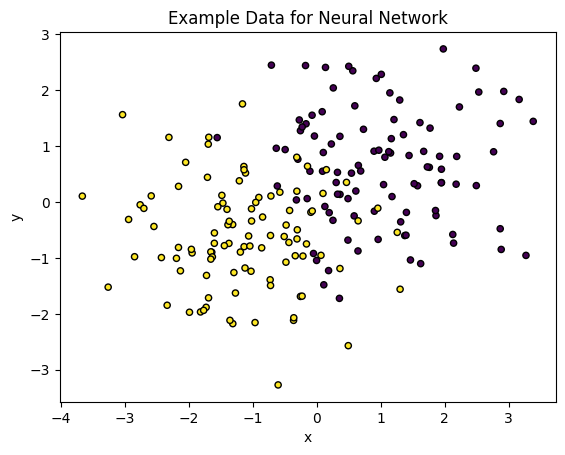

In [6]:
X, y = generate_data()

# Plot
plt.title("Example Data for Neural Network")
plt.scatter(X[:, 0], X[:, 1], s=20, c=y, edgecolor="k")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


### MLP Classifier

Let's now fit a network. We'll use the following package to implement a basic
neural network:


In [7]:
from sklearn.neural_network import MLPClassifier

# MLP: multilayer perceptron


The `MLPClassifier` model has many arguments we can put in, the most common ones
to use are:

    hidden_layer_sizes =  (size of layer 1, size of layer 2, size of layer 3)
    activation
    solver

The parameter `hidden_layer_sizes` determines the shape of the hidden layers. We
pass that in as a tuple of integers where the integer in position $i$ determines
how many hidden units are in layer $i$.

The parameter `activation` is used to specify the activation functions, which
defaults to `relu`.

The parameter `solver` tells `scikit-learn` how to fit the network to the data.
The solver we used, the _LBFGS_ algorithm, is good for smaller problem
instances. Some other common ones are `sgd` and `adam`. In general we won't use
`scikit-learn` to train neural networks. Instead we use packages like _Keras_,
_TensorFlow_, _PyTorch_, etc., which are all specifically designed for neural
networks.


#### Example: Single Hidden Layer with a Single Node

Let's fit a simple network of one hidden layer with one node:

<img src="https://drive.google.com/uc?export=view&id=1-UyoJ3ftC6oLPjaQFL_7TFI-VrZIX-ed" width=300 height=300 alt="Drawing" style="margin:20px 20px"/>


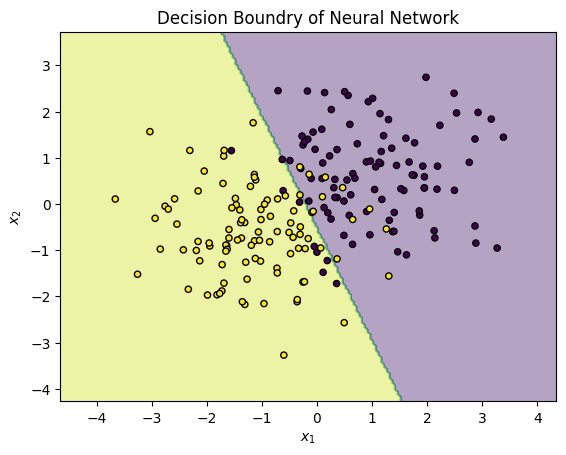

In [8]:
NN_model = MLPClassifier(hidden_layer_sizes=(1), solver="lbfgs")
NN_model.fit(X, y)

plot_boundaries(NN_model, X, y)


Since there was only one hidden unit, the network is unable to learn anything
complex. It's not learning non-linear features of non-linear features. It's
effectively just a logistic regression model. But what happens when we add in
more units and hidden layers?


#### Example: 5 Hidden Layers with 5 Nodes Each

Let's fit a more complex network of five hidden layers with five nodes each:

<img src="https://drive.google.com/uc?export=view&id=1WfEXuqomB66DpKcMvBR57nXTI9XXFV9d" width=600 style="margin:20px 20px"/>


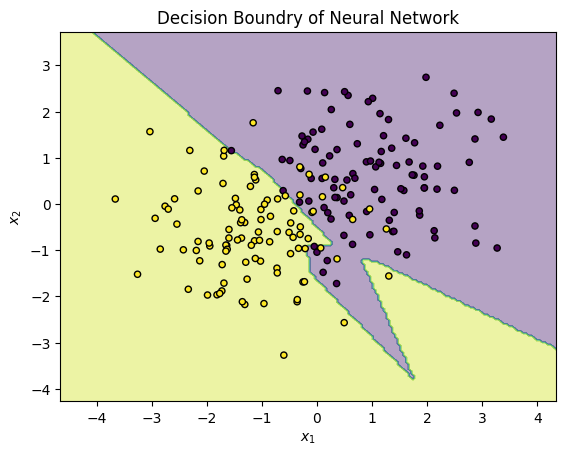

In [9]:
NN_model = MLPClassifier(hidden_layer_sizes=(5, 5, 5, 5, 5), solver="lbfgs", random_state=11)
NN_model.fit(X, y)

plot_boundaries(NN_model, X, y)


This larger, more complex, network is able to learn more complex boundaries. It
is non-linear and able to fit much more of our data. Unfortunately, it is
basically impossible to interpret what a neural network is doing under the hood.
We basically treat them as a black box, feeding in the inputs and receiving the
outputs.

In the context of neural networks, this network is still very simple. In
practice, most neural networks will have many more layers with many more nodes
each.


## TensorFlow

In industry, most organizations will use either TensorFlow or PyTorch to build
their neural networks. For the remainder of this notebook we will focus on
building neural networks using TensorFlow.


### Keras

Originally, TensorFlow was a complex, low-level library for building neural
networks. To overcome this complexity, a group of people created a separate
library, called Keras, which was an interface to make it easier to build
sophisticated neural networks in TensorFlow and other neural network libraries.
Keras was so popular and widely used that as of TensorFlow 2.X, Keras is
integrated directly into TensorFlow and is the primary interface used to build
neural networks in TensorFlow.


### Building a Neural Network Using Keras

The process of building a network using Keras can generally be broken down into
four separate steps:

1. **Build the model**: This is the step where we will declare the structure of
   the network — primarily the types and sizes of the hidden layers.
2. **Compile the model**: This step allows us to customize some of the settings
   that will be used for training.
3. **Train the model**
4. **Evaluate the model and generate predictions**


### Example: 5 Hidden Layers with 5 Nodes Each

Let's take a closer look at how to build a neural network using TensorFlow by
recreating the network we create previously using `scikit-learn`'s MLP
Classifier.

<img src="https://drive.google.com/uc?export=view&id=1WfEXuqomB66DpKcMvBR57nXTI9XXFV9d" width=600 style="margin:20px 20px"/>


To start, let's import the required modules we will need to create this network
using TensorFlow.


In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


2022-10-01 10:14:11.955684: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


We will use the same synthetic data from before to train our network. However,
let's also generate a test set to allow us to further evaluate our model.


In [11]:
X_train, y_train = generate_data()
X_test, y_test = generate_data(random_seed=1)  # generate test data with a different random seed


**Step 1.** Build the model:


In [12]:
# Create a new sequential model
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(5, activation="relu"))
model.add(layers.Dense(5, activation="relu"))
model.add(layers.Dense(5, activation="relu"))
model.add(layers.Dense(5, activation="relu"))
model.add(layers.Dense(5, activation="relu"))


# Declare the output layer
model.add(layers.Dense(1, activation="sigmoid"))


2022-10-01 10:14:18.956543: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Step 2.** Compile the model


In [13]:
model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # Metric used to evaluate model
    metrics=[keras.metrics.BinaryAccuracy()],
)


**Step 3.** Train the Model


In [14]:
history = model.fit(X_train, y_train, epochs=100, verbose=1)


Epoch 1/100
7/7 [==============================] - 2s 4ms/step - loss: 0.6885 - binary_accuracy: 0.5000
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6864 - binary_accuracy: 0.5050
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6848 - binary_accuracy: 0.5050
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6830 - binary_accuracy: 0.5250
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6811 - binary_accuracy: 0.5200
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6786 - binary_accuracy: 0.5100
Epoch 7/100
7/7 [==============================] - 0s 17ms/step - loss: 0.6761 - binary_accuracy: 0.5000
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6726 - binary_accuracy: 0.4950
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6686 - binary_accuracy: 0.5050
Epoch 10/100
7/7 [==============================] - 0s 3ms/step

**Step 4.** Evaluate the model using the test data and generate predictions


In [15]:
# Evaluate the network
train_accuracy = history.history["binary_accuracy"][-1]
result = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {result[1]:.4f}")

# Generate predictions
predictions = model.predict(X_test)


Train Accuracy: 0.8950
Test Accuracy: 0.9050
7/7 [==============================] - 0s 5ms/step


911/911 [==============================] - 2s 2ms/step


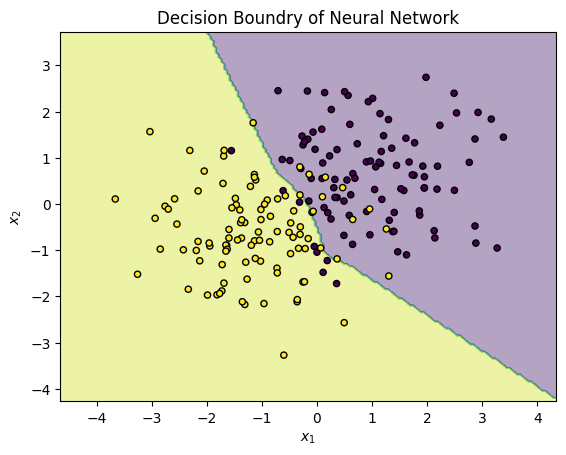

In [16]:
plot_boundaries(model, X_train, y_train)


In practice, you will use much larger networks than this example. Let's see what
happens if we use a larger network on this data.


### Example: 7 Hidden Layers with 40 Nodes Each


In [17]:
# Create a new sequential model
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))

# Declare the output layer
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy(), metrics=[keras.metrics.BinaryAccuracy()]
)


In [18]:
# Train the network, turn verbosity off since we are running for many epochs
history = model.fit(X_train, y_train, epochs=1000, verbose=0)


In [19]:
# Evaluate the network
train_accuracy = history.history["binary_accuracy"][-1]
result = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {result[1]:.4f}")

# Generate predictions
predictions = model.predict(X_test)


Train Accuracy: 1.0000
Test Accuracy: 0.8450
7/7 [==============================] - 0s 3ms/step


911/911 [==============================] - 2s 2ms/step


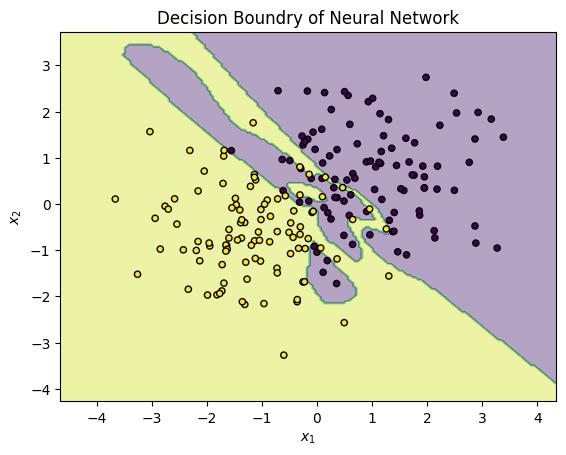

In [20]:
plot_boundaries(model, X_train, y_train)


Looking at the results of this larger network, we can see that our decision
boundary is even more non-linear. A larger network has the advantage of being
able to create more complex models, but it also makes it easier to overfit to
our training data.


#### Exercise

1.  Use the Keras API to create the following neural network in TensorFlow.

<img src="https://drive.google.com/uc?export=view&id=1wN0zkh6FjuqyjW4KEEmUtzaKwrIuDpne" width=400 style="margin:20px 20px"/>

2. How well did this network perform?


#### Solution


Let's build the model based on the specifications:


In [20]:
# Q1.

model = keras.Sequential()

# Hidden Layers
model.add(layers.Dense(5, activation="relu"))
model.add(layers.Dense(5, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(3, activation="relu"))

# Output Layer
model.add(layers.Dense(1, activation="sigmoid"))

# Compile our Model
model.compile(
    optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy(), metrics=[keras.metrics.BinaryAccuracy()]
)


The model can now be trained:


In [21]:
history = model.fit(X_train, y_train, epochs=1000, verbose=0)


Finally, we can evaluate it's performance by looking at the train/test accuracy:


In [22]:
# Q2. Evaluate the network
train_accuracy = history.history["binary_accuracy"][-1]
result = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {result[1]:.4f}")

# Generate predictions
predictions = model.predict(X_test)


Train Accuracy: 0.9100
Test Accuracy: 0.9300
7/7 [==============================] - 0s 1ms/step


911/911 [==============================] - 1s 1ms/step


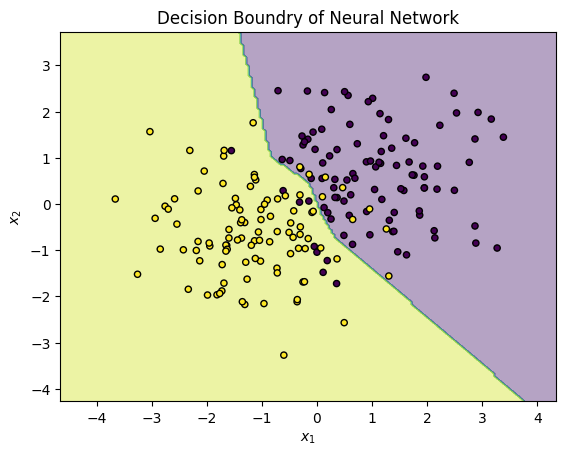

In [23]:
plot_boundaries(model, X_train, y_train)


Based on the accuracy, we would say that the model is still overfitting on the
training set (92% train accuracy vs 86% test accuracy). At the same time, the
decision boundary does not look as jagged as the previous model we constructed.


## Customizing Our Neural Network


### Activation Functions

One of the parameters we can select for our network is the type of activation
functions that will be used. In TensorFlow, we declare the type of activation
function layer-by-layer. This is done by passing an argument into our layer
declaration:

```python
layers.Dense(40, activation="relu")
```

There a many different activation functions we can select, but these are some of
the most common:


**Sigmoid Function**

$\sigma(x) = \frac{1}{1+e^{-x}}$


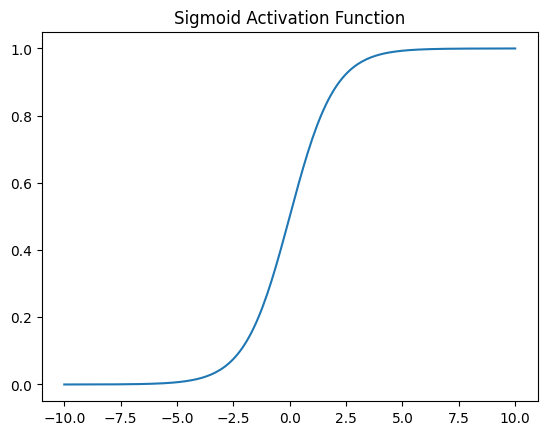

In [21]:
x = np.arange(-10.0, 10.1, 0.1)
sigma = 1 / (1 + np.exp(-x))

plt.figure()
plt.plot(x, sigma)
plt.title("Sigmoid Activation Function")
plt.show()


**Hyperbolic Tangent Function**

$tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$


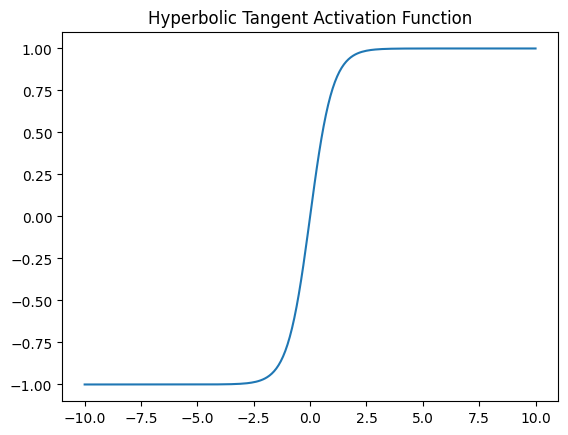

In [22]:
x = np.arange(-10.0, 10.1, 0.1)
tanh = np.tanh(x)

plt.figure()
plt.plot(x, tanh)
plt.title("Hyperbolic Tangent Activation Function")
plt.show()


**Rectified Linear Unit (ReLu) Function:**

$ReLu(x) = max(0,x)$


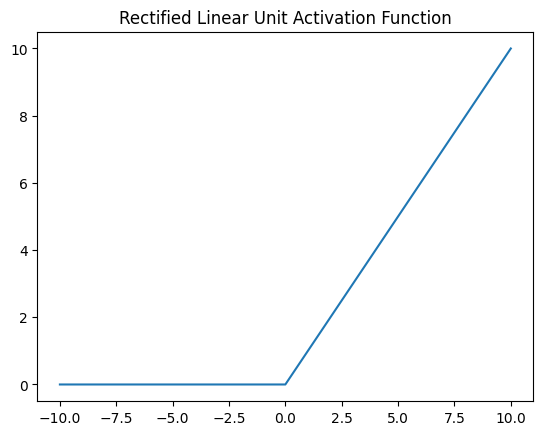

In [23]:
x = np.arange(-10.0, 10.1, 0.1)
relu = np.where(x < 0.0, 0.0, x)

plt.figure()
plt.plot(x, relu)
plt.title("Rectified Linear Unit Activation Function")
plt.show()


### Optimization


#### Loss Functions

The loss function provides a measure of how poorly our model fits our data. We
will train our neural networks by attempting to minimize this function. Our
decision on which loss function to use is determined by the type of problem we
are attempting to solve.

**Common Loss Functions:**

- Binary Cross Entropy (Binary Classification)
- Categorical Cross Entropy (Multi-Class Classification) Implemented as
  [SparseCategoricalCrossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy)
  or
  [CategoricalCrossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy)
- Mean Squared Error (Regression)


#### Gradient Descent

Remember that when a network is fit, in the backpropagation phase, we don't
actually find the optimal value for each weight in one pass. Instead we make
several passes making small iterative updates each time. This is because we
don't have a way to find the optimal setting of the weights, we can only make
improvements that can lead us to a better setting.

Consider the following image, it shows the contribution to the loss (the
vertical axis) of a neuron with two weights (the two horizontal axes).


<img src="https://drive.google.com/uc?export=view&id=1GEWnZlDttR7TKIfPh_I8Gbw3aiQIeHBg" width=400 height=400>


We want to set the weights so we're at the minimum loss, or the smallest error,
but it can be hard to evaluate where that is. This is especially difficult with
thousands of weights feeding into a neuron. Instead we employ a process called
gradient decent.

We iteratively update the weights, moving them in a direction which lowers the
error. We do this by calculating the gradient, or direction of most change, and
adjust the weights slightly in this direction. By applying gradient descent over
and over again, we make progress towards a better and better solution. Each
backpropagation pass makes an adjustment to the weights, normally we repeat the
process for a fixed number of rounds (epochs) or until there is no significant
change.

One important point, the gradient points in the direction of the change but it
does not tell us how large of a step to make, instead we control the magnitude
of the step by specifying the learning rate. Selecting a learning rate can be
tricky, too small and we'll take a long time to converge to a good solution, too
high and we'll overshoot where we wanted to end up. There are also issues with
never finding optimal solutions if the learning rate is too low.


#### Sub-Optimal Solutions

While gradient descent points in the direction of a _better_ solution, it may
not lead to the _optimal_ solution. Consider the following example of a neuron
with one weight. From some starting points, if we follow the steepest path
downward we will end up trapped in a local minimum. There is a far better
solution, the global minimum, but gradient descent may never discover it.


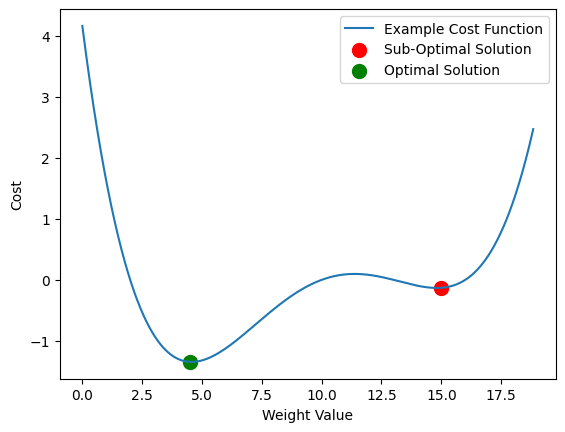

In [24]:
def cost_function(x):
    return (x - 10) * (x - 13) * (x - 16) * (x - 2) / 1000


sub_optimal_x = 15
sub_optimal_y = cost_function(sub_optimal_x)

optimal_x = 4.5
optimal_y = cost_function(optimal_x)

x = np.arange(0, 6 * np.pi, 0.01)
plt.plot(x, cost_function(x))
plt.scatter(sub_optimal_x, sub_optimal_y, marker="o", s=100, color="r")
plt.scatter(optimal_x, optimal_y, marker="o", s=100, c="g")
plt.ylabel("Cost")
plt.xlabel("Weight Value")
plt.legend(["Example Cost Function", "Sub-Optimal Solution", "Optimal Solution"])
plt.show()


Most of the time we can't expect to find the global minimum, and instead end up
trapped in local minimum. This usually isn't an issue since the local ones still
tend to be pretty good.


#### Escaping Local Minima

One technique used to escape a local minimum is **momentum**.

You can think of gradient descent as rolling a ball down a hill. The hill is our
error surface, and the location of the ball is the current setting of the
model's weight parameters. The gradient points in the direction of the most
change, or where gravity would pull our ball, and the learning rate represents
how hard gravity is pulling on the ball. But this analogy isn't perfect. After
doing an update of model parameters, we have no memory of what direction we just
tweaked the weights. For the next round of updates we are essentially starting
over. But with the ball rolling down a hill, there is _memory_ between moments.
It builds up momentum so that even if we reach the bottom of a hill, it may have
enough built-up momentum to keep rolling over the crest of the next hill.


Let's look at this comparison (taken from the TensorFlow page) of optimization
methods with two parameters:

<img src="https://drive.google.com/uc?export=view&id=1lJ5BkMaety6fQ-AvQ3YyN91zgEHSA3PG" width=350 height=300>

While this shows gradient descent getting stuck in a local minimum, this is not
always the case. Generally these more advanced optimizers tend to do better, but
as with almost all things we've seen, there is no perfect answer.


#### Optimization in TensorFlow

When using TensorFlow, you are able to customize the optimization method and
loss function during the compile step.

```Python
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy()
)
```

TensorFlow supports many different optimization and loss functions. For the full
list, check out the TensorFlow documentation:
https://www.tensorflow.org/api_docs/python/tf/keras


In [ ]:
keras.optimizers.SGD(momentum=)

### Epochs

One of the hyperparameters that we can adjust when designing our neural networks
is the number of epochs that we will train our model for. If we train our model
for too long, we are very likely to overfit the model to our training data.

There are a few methods we can use to decide when to stop training. A common
method to determine when to stop training is to look at a plot of the training
loss compared to the validation loss. Lets take a look at this approach:


In [25]:
# Create a new sequential model
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))

# Declare the output layer
model.add(layers.Dense(1, activation="sigmoid"))

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy(), metrics=[keras.metrics.BinaryAccuracy()]
)

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=1,
    # Pass in a validation data set to test each epoch.
    validation_data=(X_test, y_test),
)


Epoch 1/100
7/7 [==============================] - 2s 65ms/step - loss: 0.6822 - binary_accuracy: 0.6500 - val_loss: 0.6615 - val_binary_accuracy: 0.7750
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6444 - binary_accuracy: 0.7500 - val_loss: 0.5998 - val_binary_accuracy: 0.7200
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.5626 - binary_accuracy: 0.8200 - val_loss: 0.5139 - val_binary_accuracy: 0.8250
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 0.4785 - binary_accuracy: 0.8800 - val_loss: 0.4535 - val_binary_accuracy: 0.8700
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 0.4119 - binary_accuracy: 0.8950 - val_loss: 0.3823 - val_binary_accuracy: 0.9000
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 0.3367 - binary_accuracy: 0.9050 - val_loss: 0.2835 - val_binary_accuracy: 0.9200
Epoch 7/100
7/7 [==============================] - 0s 12ms/step - loss: 0.2740

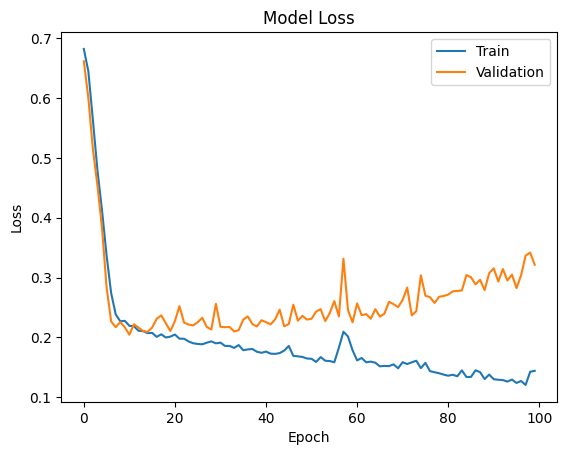

In [26]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.show()


Looking at this result, we can see that the training loss continues to decrease
after each epoch. However, the validation loss actually starts to increase.
After a certain number of epochs our model begins to overfit to our training
data. We can use this plot to determine the number of epochs we want to run our
model for. In this example, we would probably stop training our model after
about 10 epochs.

In practice, many neural networks will take so long to train that we will never
reach this threshold. In these cases, we will train for as long as feasibly
possible or until we get results that are satisfactory for our application.


### Regularization

Like many of the previous models we've seen we can also regularize neural
networks to help prevent overfitting.


#### L1 and L2 Regularization in TensorFlow

In TensorFlow, we are able to apply a L1 or L2 regularization on a per layer
basis. As we saw previously, L1 and L2 regularization encourages the edge
weights to stay close to zero by adding an additional term to the cost function
that penalizes large weights.

Using L1 and L2 regularization doesn't change the actual optimization method but
instead changes the shape of the error surface. By forcing some weights to be
zero, we make our model less sensitive to small shifts in our input data.


In [27]:
# Create a new sequential model
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))

# Declare the output layer
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy(), metrics=[keras.metrics.BinaryAccuracy()]
)

# Train the network
history = model.fit(X_train, y_train, epochs=500, verbose=0)

# Evaluate the network
train_accuracy = history.history["binary_accuracy"][-1]
result = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {result[1]:.4f}")


Train Accuracy: 0.9450
Test Accuracy: 0.8700


911/911 [==============================] - 2s 2ms/step


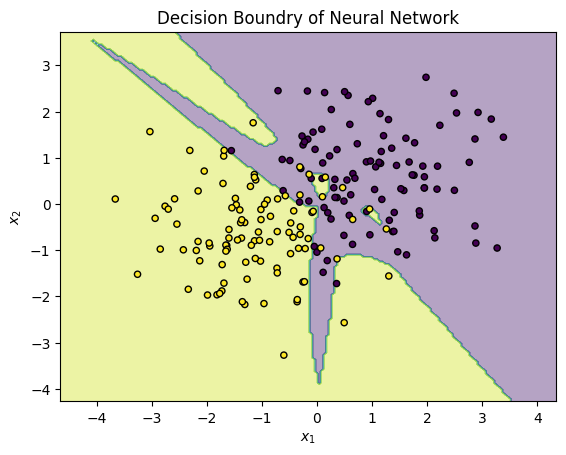

In [28]:
plot_boundaries(model, X_train, y_train)


It's learned some pretty non-linear boundaries — they aren't even in connected
regions. Furthermore, there is a large difference between our training accuracy
and test accuracy suggesting that our model has overfit. What happens if we add
some L2 regularization to our neural network?


In [29]:
# Create a new sequential model
model = keras.Sequential()

# Create a regularizer with a factor of 0.005 and apply it to all hidden layers
regularizer = keras.regularizers.l2(0.005)

# Declare the hidden layers
model.add(layers.Dense(40, activation="relu", kernel_regularizer=regularizer))
model.add(layers.Dense(40, activation="relu", kernel_regularizer=regularizer))
model.add(layers.Dense(40, activation="relu", kernel_regularizer=regularizer))

# Declare the output layer
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy(), metrics=[keras.metrics.BinaryAccuracy()]
)

# Train the network
history = model.fit(X_train, y_train, epochs=500, verbose=0)

# Evaluate the network
train_accuracy = history.history["binary_accuracy"][-1]
result = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {result[1]:.4f}")


Train Accuracy: 0.9150
Test Accuracy: 0.9000


911/911 [==============================] - 2s 3ms/step


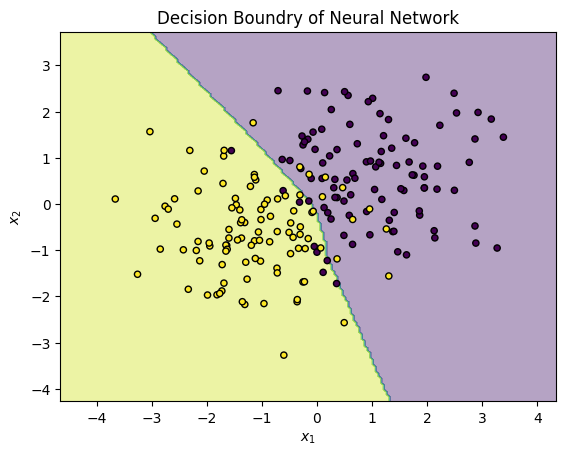

In [30]:
plot_boundaries(model, X_train, y_train)


After applying regularization, we see that the decision boundary is much
simpler, and the difference between the train and test accuracy is much smaller.
We actually ended up getting a higher test accuracy than our previous model
without regularization.

This is one way to help with overfitting a neural network.


#### Dropout

Another way to control overfitting is the use of the dropout of some nodes in
layers. This technique requires randomly ignoring or dropping out a proportion
nodes by setting the weights leading to the node to 0. By leaving out some
nodes, we force the neural network to learn more robust features from the data.

<center><img src = https://miro.medium.com/max/1879/1*iWQzxhVlvadk6VAJjsgXgg.png width = 500 >

<center><i> Taken from Srivastava, Nitish, et al. ”Dropout: a simple way to prevent neural networks from
overfitting”, JMLR 2014


#### Dropout in TensorFlow

In TensorFlow we can add dropout to our model by adding a `Dropout` layer. This
allows us to specify where in our neural network we will apply dropout. Let's
apply dropout to the same neural network as before:


In [33]:
# Create a new sequential model
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dropout(0.2))  # Set 20% of the nodes to 0.
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dropout(0.2))

# Declare the output layer
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy(), metrics=[keras.metrics.BinaryAccuracy()]
)

# Train the network
history = model.fit(X_train, y_train, epochs=500, verbose=0)

# Evaluate the network
train_accuracy = history.history["binary_accuracy"][-1]
result = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {result[1]:.4f}")


Train Accuracy: 0.9050
Test Accuracy: 0.8650


911/911 [==============================] - 2s 2ms/step


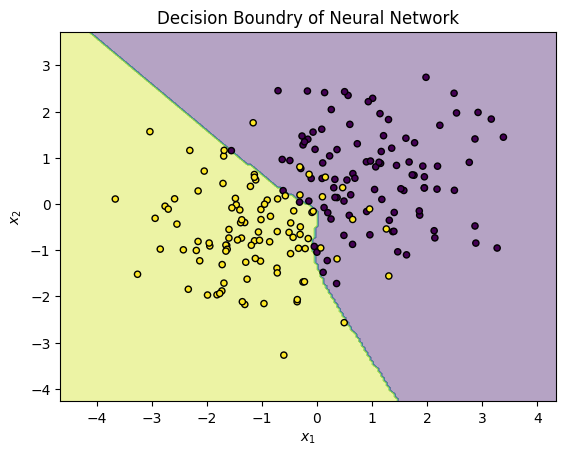

In [34]:
plot_boundaries(model, X_train, y_train)


The decision boundary is much simpler after applying dropout between our layers.


### Scaling

We've said many times that scaling tends to help with descent-based algorithms,
(often the documentation for these solvers insist on transforming the data). To
understand why, consider a case with two features and doing a gradient descent
algorithm with two weights being adjusted, one for each feature.

If our first feature lies on a wide range, say in the hundreds of thousands, its
associated weight will only need to make small adjustments to have a meaningful
impact on the prediction and hence the cost. Conversely, if the second feature
lay in a very small range, say fractional, its associated weight will require a
large change to impact the cost.

We can plot out what cost functions like this would look like:


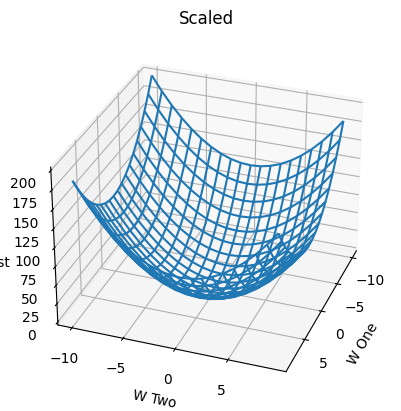

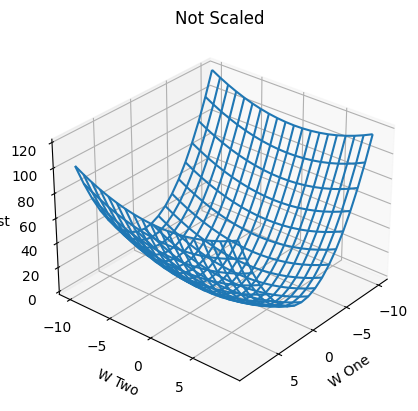

In [44]:
import mpl_toolkits.mplot3d as m3d
import numpy as np

x = np.arange(-10, 10, 1)
y = np.arange(-10, 10, 1)
xx, yy = np.meshgrid(x, y)

Z = xx**2 + yy**2

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(xx, yy, Z, rstride=1, cstride=1)
ax.set_xlabel("W One")
ax.set_ylabel("W Two")
ax.set_zlabel("Cost")
ax.view_init(30, 20)
plt.title("Scaled")
plt.show()

x = np.arange(-10, 10, 1)
y = np.arange(-10, 10, 1)
xx, yy = np.meshgrid(x, y)

Z = xx**2 + (yy**2) / 5

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(xx, yy, Z, rstride=1, cstride=1)
ax.set_xlabel("W One")
ax.set_ylabel("W Two")
ax.set_zlabel("Cost")
ax.view_init(30, 40)
plt.title("Not Scaled")

plt.show()


In the case of "not scaled features" a change in Theta One results in a large
change in error, while a change in Theta Two barely impacts the error. This is
not true for the scaled features, here the features have an equal impact.


So why is this important? Recall we said that gradient descent was essentially
rolling a ball down a (possibly high dimensional) hill. What happens when you
roll a ball down the above "hills"? In the non-scaled case, we get the feature
spanning a large range dominating the direction of the ball. This can lead to
slower convergence and poor performance. In the scaled case, we are removing any
bias that feature scale can have on the algorithm.

One note of caution. This is a highly idealized example — there are only two
features and only one local/global minimum. The surfaces we tend to deal with
are much more complex, with many local minima that we can become trapped in. But
the point still remains that by scaling data we remove any arbitrary effects
from differences in feature scale. This generally leads to better performance.


### Batch normalization


_Batch normalization_ is a layer-by-layer scaling technique that was found to
improve the training of deep neural networks and their performance.

The method was [originally introduced](https://arxiv.org/abs/1502.03167) to
mitigate _internal covariate shift_: as the network is trained and the
parameters are adjusted, the distribution of the input to each hidden layer
keeps changing. The model needs to adjust to these changes which makes learning
unstable.

Since then, it was [mostly disproved](https://arxiv.org/abs/1805.11604) that
internal covariate shift is really stopping the models from effective learning,
but adding batch normalization comes with many other benefits:

- Batch normalization acts as regularization and the architecture needs to rely
  less on dropout layers to avoid overfitting;
- The changes in gradients become less severe (in other words, the _loss surface
  is smoother_) which helps the learning process and gives improved performance;
- Larger learning rates can be used which leads to faster convergence.


<img src = "https://drive.google.com/uc?export=view&id=15iRX55JgiMwkLmCxvUkg3YezzURh3P19" width = 500 >

Batch normalization is a transformation between layers: first, it normalizes
each batch $X$ to zero mean and unit variance:

$$X_{norm} = \frac{X - \mu_X}{\sigma_X}$$

Here $\mu_X$ is the mean of $ X $ and $\sigma$ is the variance (all calculated
coordinate-wise). If we were to stop here and just normalize each batch between
the layers, that would severely restrict the representational power of the
model. So, we allow the network to rescale the batch after the normalization to
some mean $\beta$ and variance $\gamma$. These parameters are also learnable and
depend only on the layer.

$$X_{rescaled} = \gamma X_{norm} + \beta$$

So, instead of the original batch $X$, we will pass the rescaled $X_{rescale}$
to the next layer.


[Batch normalization layers](https://keras.io/api/layers/normalization_layers/batch_normalization/)
are implemented in Keras and can be added to models just like any other layer:


In [35]:
# Create a new sequential model
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())

model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())

model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dropout(0.2))

# Declare the output layer
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy(), metrics=[keras.metrics.BinaryAccuracy()]
)

# Train the network
history = model.fit(X_train, y_train, epochs=500, verbose=0)

# Evaluate the network
train_accuracy = history.history["binary_accuracy"][-1]
result = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {result[1]:.4f}")


Train Accuracy: 0.9100
Test Accuracy: 0.8950


911/911 [==============================] - 3s 2ms/step


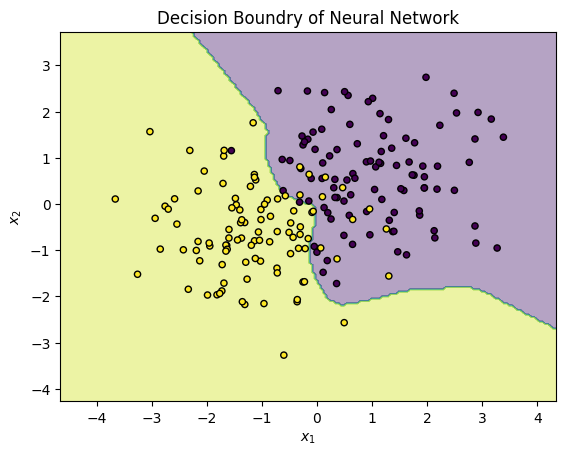

In [36]:
plot_boundaries(model, X_train, y_train)


## Multi Class Neural Networks

Recall, we said a neural network had built in multi-class capabilities. We just
need to create one node per class in the output layer.

We will use the iris data to showcase this, taking only two of the four features
and adding some noise to make the classification problem harder.


In [47]:
def plot_multi_class_boundary(model, X, Y):
    """
    Helper function that plots the decision boundaries of a model and data (X,Y)
    code modified from:
    https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
    """

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)

    # Plot
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor="k")
    plt.title("Decision Boundry of Neural Network")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.show()


In [37]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


iris = load_iris()
X = iris.data
y = iris.target

# Add some noise to the data
random_state = np.random.RandomState(10)
n_samples, n_features = X.shape
X = X + (random_state.randn(n_samples, n_features))

# only take the last two columns
X = X[:, [2, 3]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


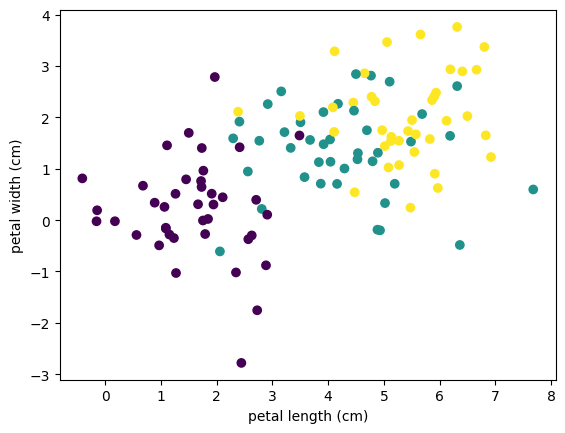

In [38]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()


Fit and visualize the neural network boundaries:


In [39]:
# Create a new sequential model
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))

# Declare the output layer
model.add(layers.Dense(3, activation="softmax"))

# Compile the model
model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # Metric used to evaluate model
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)


In [40]:
# Fit the model
history = model.fit(X_train, y_train, epochs=5000, verbose=0)


In [52]:
# Evaluate the model using the test data and generate predictions
train_accuracy = history.history["sparse_categorical_accuracy"][-1]
result = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {result[1]:.4f}")

predictions = model.predict(X_test)


Train Accuracy: 0.9167
Test Accuracy: 0.7000
1/1 [==============================] - 0s 75ms/step


1080/1080 [==============================] - 1s 1ms/step


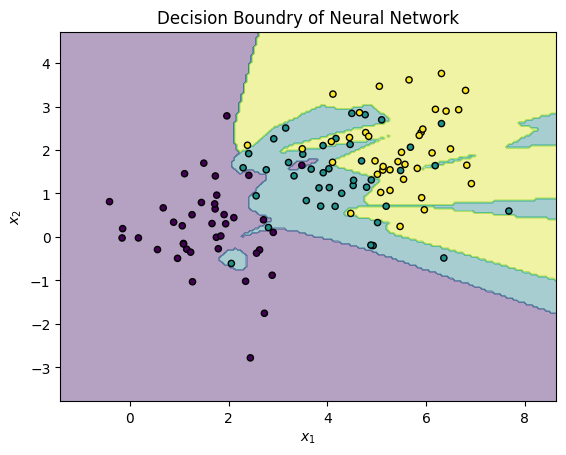

In [54]:
plot_multi_class_boundary(model, X_train, y_train)


We get some pretty non-convex regions. But if we fit a network which is
regularized:


In [55]:
# Step 1. Build the model

# Create a new sequential model
model = keras.Sequential()

regularizer = keras.regularizers.l2(0.01)

# Declare the hidden layers
model.add(layers.Dense(40, activation="relu", kernel_regularizer=regularizer))
model.add(layers.Dense(40, activation="relu", kernel_regularizer=regularizer))
model.add(layers.Dense(40, activation="relu", kernel_regularizer=regularizer))
# Declare the output layer
model.add(layers.Dense(3, activation="softmax"))

# Compile the model
model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # Metric used to evaluate model
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)


In [56]:
# Fit the model
history = model.fit(X_train, y_train, epochs=5000, verbose=0)


In [57]:
# Evaluate the model using the test data and generate predictions
train_accuracy = history.history["sparse_categorical_accuracy"][-1]
result = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {result[1]:.4f}")

predictions = model.predict(X_test)


Train Accuracy: 0.8583
Test Accuracy: 0.6667
1/1 [==============================] - 0s 86ms/step


1080/1080 [==============================] - 1s 1ms/step


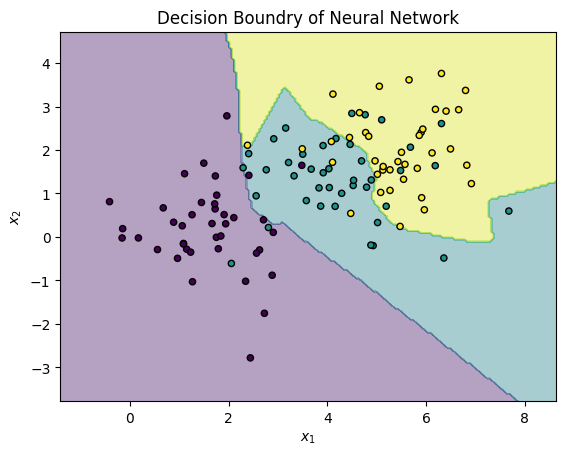

In [58]:
plot_multi_class_boundary(model, X_train, y_train)


We get more linear boundaries, even when predicting three classes.


## Neural Networks For Regression

Neural networks are not just a tool for classification, they can also be used
for regression. The key is we just leave the output layer activation alone as a
numerical output, (rather than using the softmax activation function to turn
these outputs into a probability distribution across classes).

This involves using the identity function as the activation function (which will
basically do nothing). If we know we want to predict a number greater than 0,
then we could use the ReLu function. Basically we can use any activation
function in the output layer that works well with the type of output we want to
produce.

Fitting the network is now exactly the same as before. If the output of our
network is $\hat{y}$ and the dependent variable value is $y$ we can get a loss
measure at the end:

$$Loss(x) = (y-\hat{y})^2$$

The loss for a set of data points is just the sum of these values. With the cost
function calculated, we can backpropagate the error through the network,
updating the weights and finding a better network. Let's run an example with the
California Housing dataset:


In [59]:
from sklearn.datasets import fetch_california_housing
from sklearn.neural_network import MLPRegressor

np.random.seed(100)

california = fetch_california_housing()
X = california.data
y = california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
# Create a new sequential model
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))

# Declare the output layer
model.add(layers.Dense(1))  # For regression, we don't specify any activation function.

# Compile the model
model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError(),
)


In [61]:
history = model.fit(X_train, y_train, epochs=50, verbose=0)


In [62]:
# Evaluate the model using the test data and generate predictions
train_loss = history.history["loss"][-1]
result = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {result:.4f}")

y_pred = model.predict(X_test)


Train Loss: 0.6601
Test Loss: 1.2582
129/129 [==============================] - 0s 1ms/step


In [63]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)


0.039856511065543

That's a pretty terrible score, what went wrong?

.

.

.

.

.

.

.

.

We didn't scale the data! As with many models we've seen neural networks tend to
benefit from scaling. They have regularization turned on by default, and as we
saw with logistic regression, if your data lies over a diverse range of scales,
then regularization can have a huge impact on performance.

If we re-run the experiment but with the X data scaled:


In [64]:
from sklearn.preprocessing import StandardScaler

X = california.data
y = california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [65]:
# Create a new sequential model
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))

# Declare the output layer
model.add(layers.Dense(1))  # For regression, we don't specify any activation function.

# Compile the model
model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError(),
)


In [66]:
history = model.fit(X_train, y_train, epochs=50, verbose=0)


In [67]:
# Evaluate the model using the test data and generate predictions
train_loss = history.history["loss"][-1]
result = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {result:.4f}")

y_pred = model.predict(X_test)


Train Loss: 0.2573
Test Loss: 0.2795
129/129 [==============================] - 0s 1ms/step


In [68]:
r2_score(y_test, y_pred)


0.7867428326764057

We get a much better result.


## Real Time Network

To see a live neural network implementation, check out this
[link](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.14205&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).
